In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_file='./sample behavioral cloning data/driving_log.csv'

In [3]:
log_df=pd.DataFrame.from_csv(log_file,index_col=None)

In [4]:
log_df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [5]:
log_df.shape

(8036, 7)

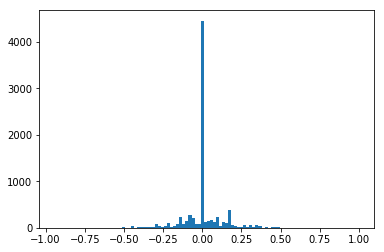

In [6]:
plt.hist(log_df['steering'],bins=100)
plt.show()

IMG/center_2016_12_01_13_34_20_600.jpg
(160, 320, 3)
The dimension of images:160,320, 3


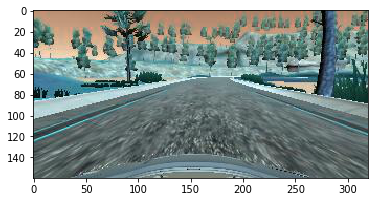

In [7]:
import cv2
import os
img_dir='./sample behavioral cloning data/'

rand_idx=np.random.randint(log_df.shape[0])

c_file=log_df.iloc[rand_idx,:]['center']
print(c_file)
img=cv2.imread(os.path.join(img_dir,c_file))
plt.imshow(img)

print(img.shape)
print("The dimension of images:%s,%s, %s"%img.shape)

### Count the number of images that 'steering' is zero

In [8]:
log_df.loc[log_df["steering"]==0,:].shape

(4361, 7)

In [9]:
from sklearn.utils import resample
sampled_index,sampled_steering=resample(log_df.index,log_df['steering'].values,n_samples=1000)

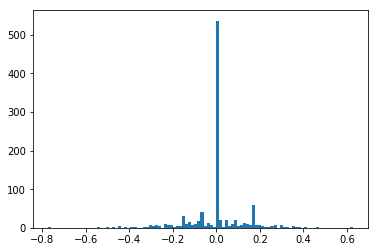

In [10]:
plt.hist(sampled_steering,bins=100)
plt.show()

### Resize the image

In [11]:
import tensorflow as tf

In [12]:
p_ch, p_row, p_col = 3, 224, 224
#p_ch, p_row, p_col = 3, 160, 320
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
single_img_placeholder=tf.placeholder("uint8",(160,320,3))
resize_op = tf.image.resize_image_with_crop_or_pad(single_img_placeholder, p_row, p_col)

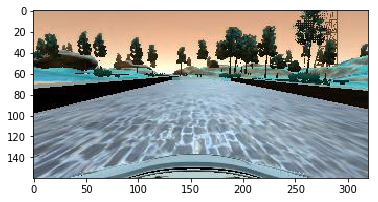

In [13]:
sample_image_file='./sample behavioral cloning data/IMG/center_2016_12_01_13_30_48_287.jpg'
img=np.zeros((1,160,320,3))
temp_img=cv2.imread(sample_image_file)
img[0]=temp_img
plt.imshow(temp_img)
img=img.astype('uint8')

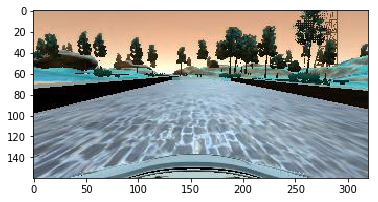

In [14]:
plt.imshow(img[0])

In [15]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})
    plt.imshow(resized_img[0])

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype uint8 and shape [160,320,3]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_UINT8, shape=[160,320,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-ece6d8696b37>", line 4, in <module>
    single_img_placeholder=tf.placeholder("uint8",(160,320,3))
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1520, in placeholder
    name=name)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/kanhua/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype uint8 and shape [160,320,3]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_UINT8, shape=[160,320,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


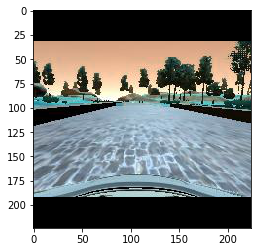

In [16]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={single_img_placeholder:temp_img})
    plt.imshow(resized_img)

### Resize the image and keep the ratio

In [27]:
p_ch, p_row, p_col = 3, 80, 160
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
resize_op = tf.image.resize_images(img_placeholder, (p_row, p_col), method=0)

In [28]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})

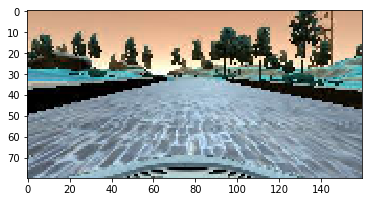

In [29]:
plt.imshow(resized_img[0].astype('uint8'))